<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset:-previous_application" data-toc-modified-id="Dataset:-previous_application-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset: previous_application</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#SK_ID_PREV-and-SK_ID_CURR" data-toc-modified-id="SK_ID_PREV-and-SK_ID_CURR-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SK_ID_PREV and SK_ID_CURR</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check missing values</a></span></li><li><span><a href="#Correlation-of-features" data-toc-modified-id="Correlation-of-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation of features</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#OHE-on-categorical-features" data-toc-modified-id="OHE-on-categorical-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>OHE on categorical features</a></span></li></ul></li><li><span><a href="#Aggregate-by-SK_ID_CURR" data-toc-modified-id="Aggregate-by-SK_ID_CURR-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aggregate by SK_ID_CURR</a></span></li></ul></div>

## Dataset: previous_application

Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import dataset

In [88]:
cwd = os.getcwd()
data_location = r"C:/Study/IUMSDS/Spring2020/I526_Applied_ML/Project/dataset/"
datafile = "previous_application.csv"

df_prev_app = pd.read_csv(os.path.join(data_location, datafile))

## EDA


************************** previous_applications ******************************

Performing basic EDA on previous_applications dataset

* The dataset has 1670214 rows and 37 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         

None


* Check data distribution: 


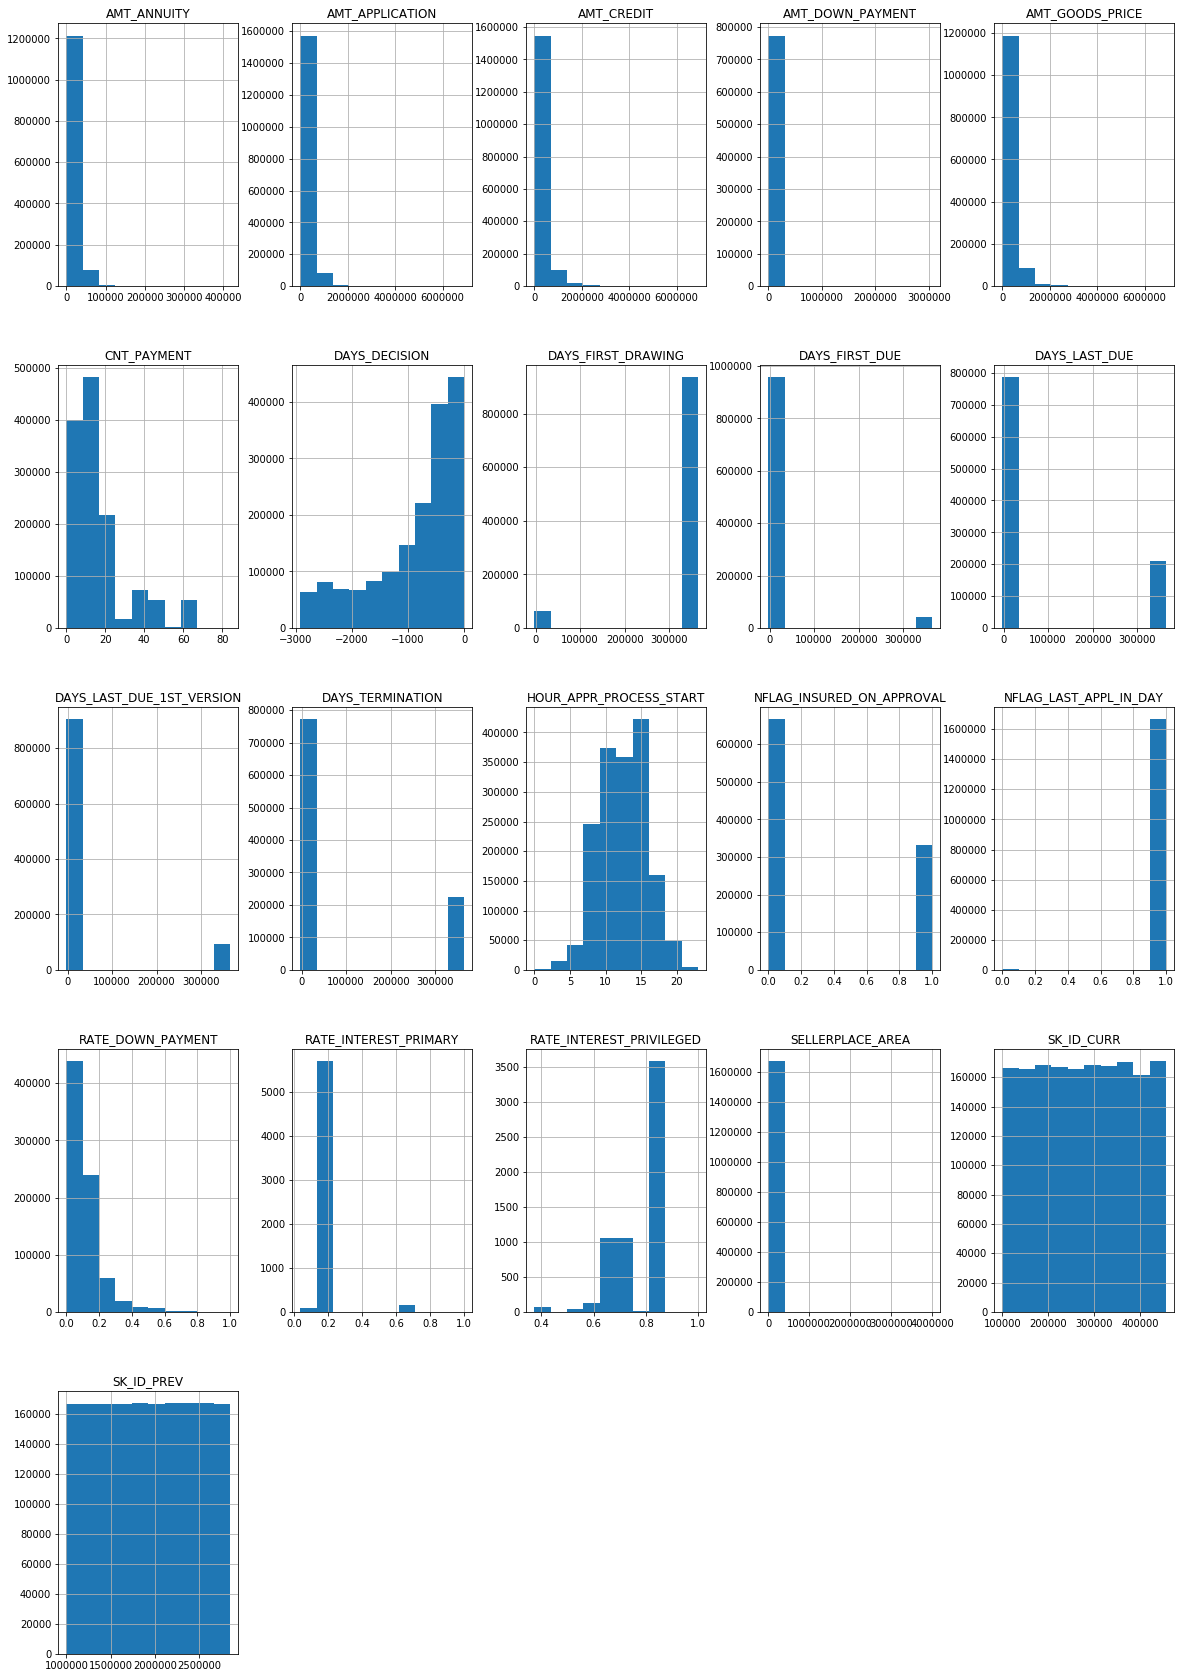

In [6]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df_pos_cash.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(20,30))
    
    
    
basic_eda(df_prev_app, 'previous_applications')

### SK_ID_PREV and SK_ID_CURR

In [9]:
print("* All records have distinct SK_ID_CURR? \t", len(df_prev_app['SK_ID_CURR'].unique()) == df_prev_app.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_prev_app['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_prev_app['SK_ID_PREV'].unique()) == df_prev_app.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_prev_app['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 338857
* All records have distinct SK_ID_PREV? 	 True
* Total number of unique SK_ID_PREV   : 	 1670214


### Categorical variables

In [13]:
cat_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']

************************************************** NAME_CONTRACT_TYPE ********************************************** 

NAME_CONTRACT_TYPE	has	0.0% nulls



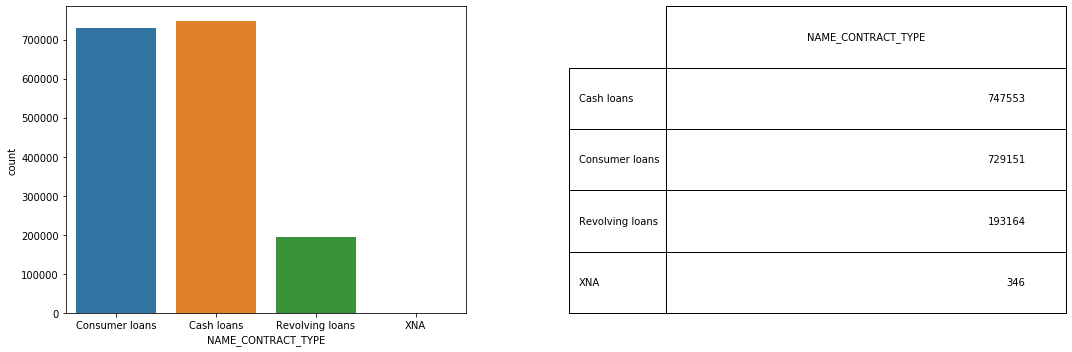

************************************************** WEEKDAY_APPR_PROCESS_START ********************************************** 

WEEKDAY_APPR_PROCESS_START	has	0.0% nulls



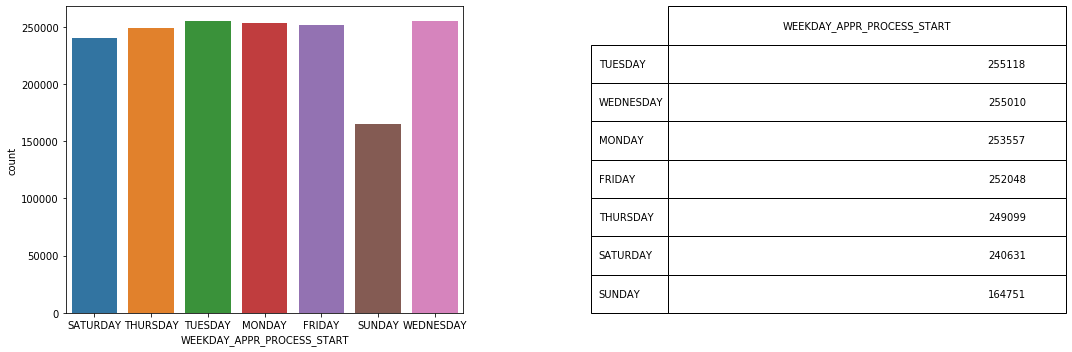

************************************************** HOUR_APPR_PROCESS_START ********************************************** 

HOUR_APPR_PROCESS_START	has	0.0% nulls



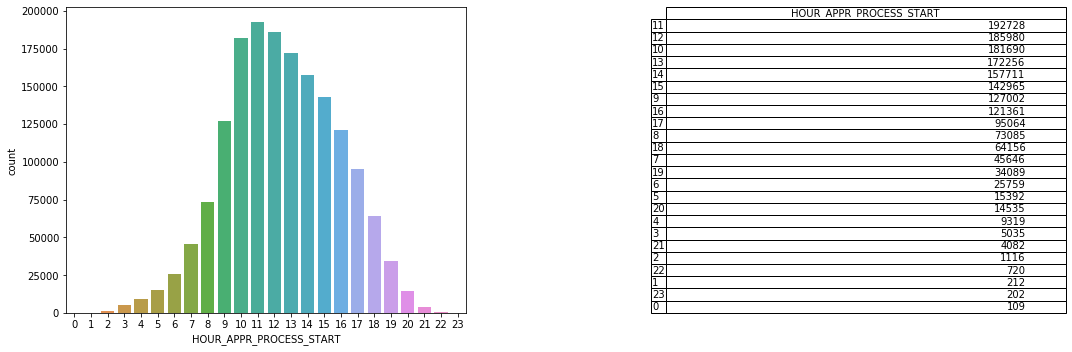

************************************************** NAME_CASH_LOAN_PURPOSE ********************************************** 

NAME_CASH_LOAN_PURPOSE	has	0.0% nulls



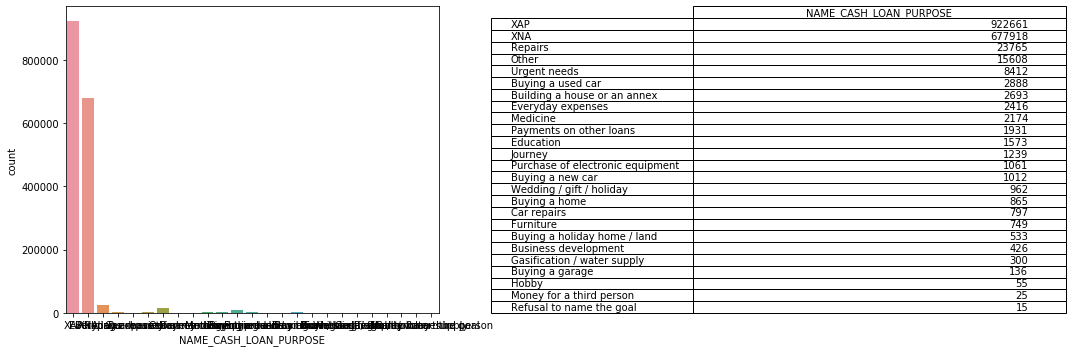

************************************************** NAME_CONTRACT_STATUS ********************************************** 

NAME_CONTRACT_STATUS	has	0.0% nulls



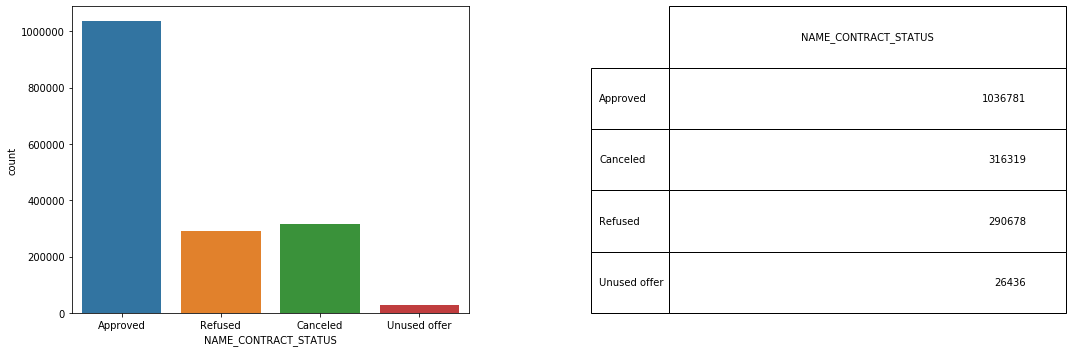

************************************************** NAME_PAYMENT_TYPE ********************************************** 

NAME_PAYMENT_TYPE	has	0.0% nulls



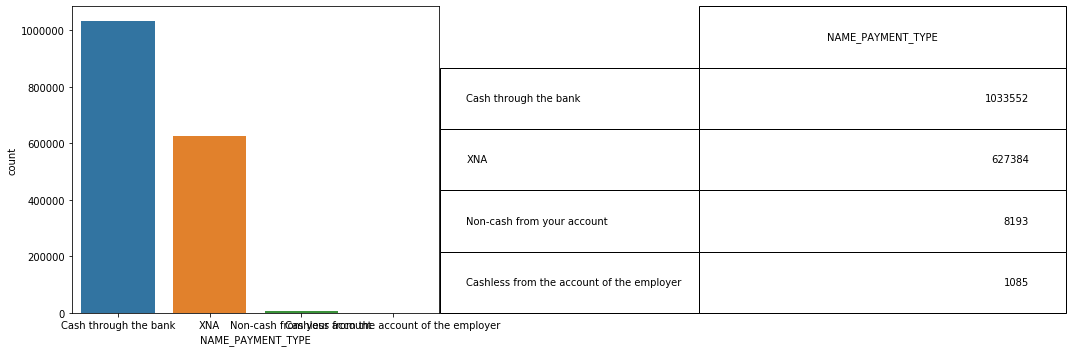

************************************************** CODE_REJECT_REASON ********************************************** 

CODE_REJECT_REASON	has	0.0% nulls



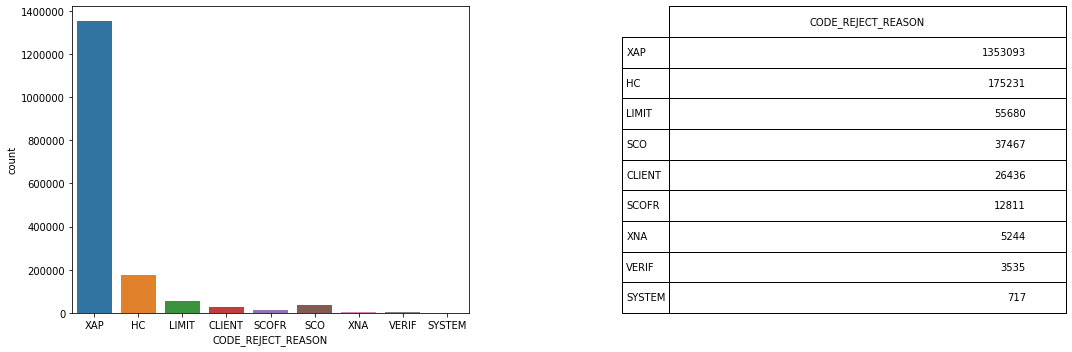

************************************************** NAME_CLIENT_TYPE ********************************************** 

NAME_CLIENT_TYPE	has	0.0% nulls



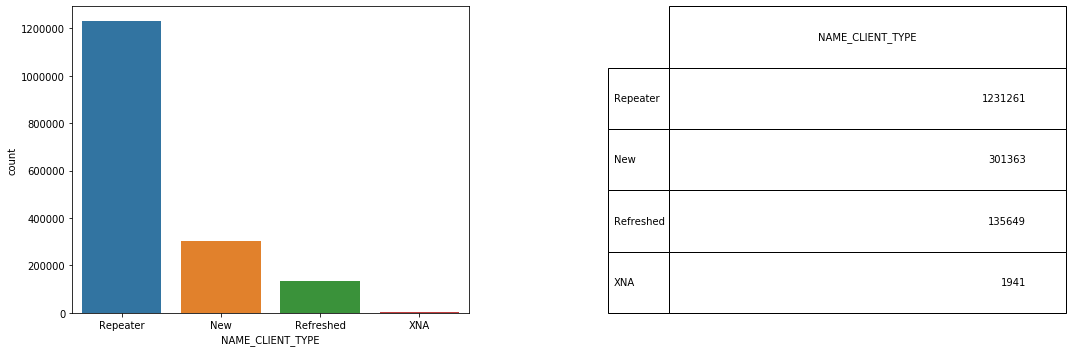

************************************************** NAME_GOODS_CATEGORY ********************************************** 

NAME_GOODS_CATEGORY	has	0.0% nulls



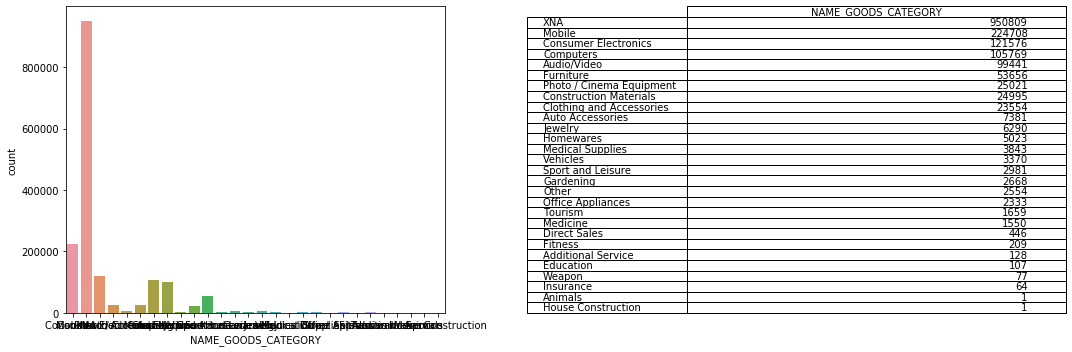

************************************************** CHANNEL_TYPE ********************************************** 

CHANNEL_TYPE	has	0.0% nulls



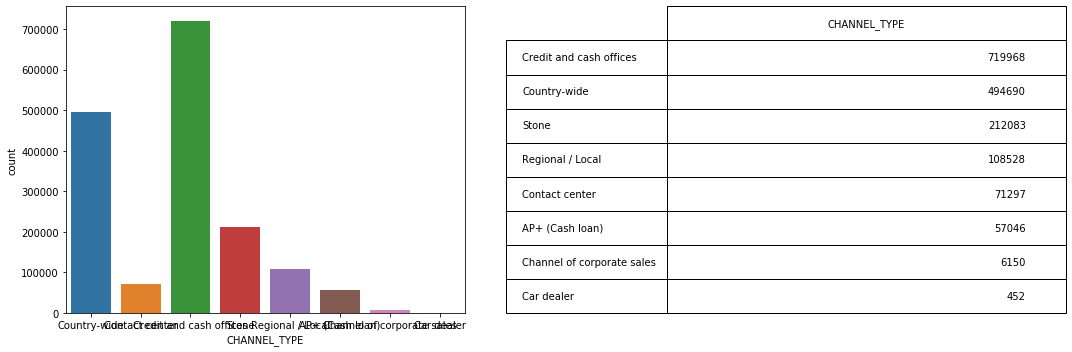

************************************************** SELLERPLACE_AREA ********************************************** 

SELLERPLACE_AREA	has	0.0% nulls



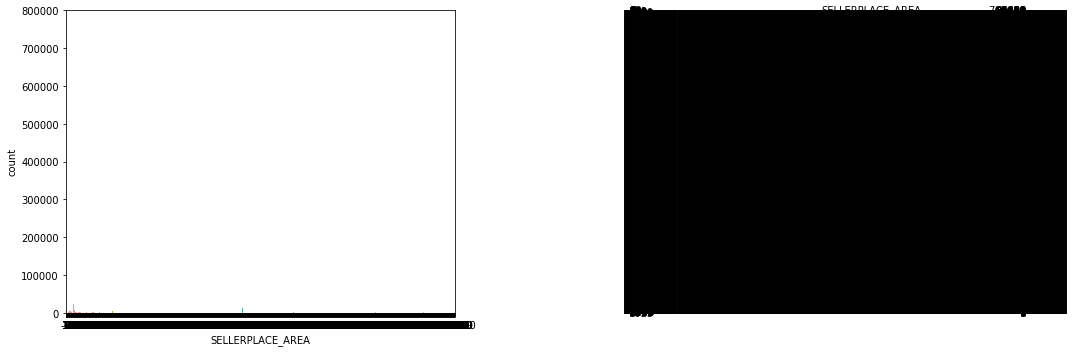

************************************************** NAME_SELLER_INDUSTRY ********************************************** 

NAME_SELLER_INDUSTRY	has	0.0% nulls



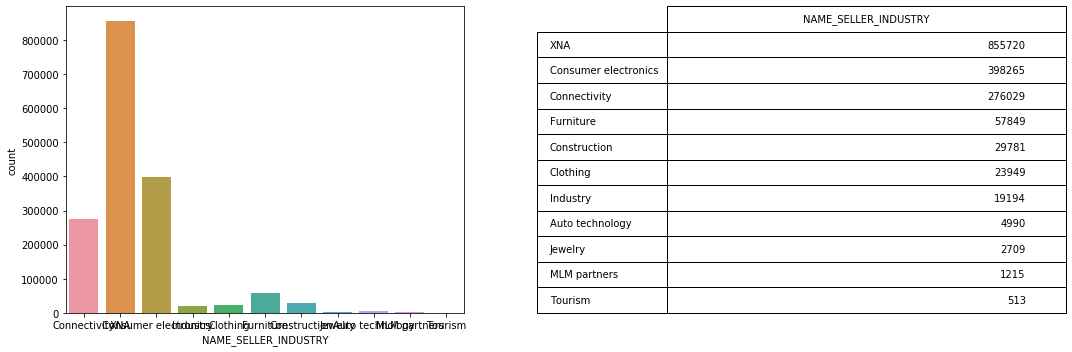

************************************************** PRODUCT_COMBINATION ********************************************** 

PRODUCT_COMBINATION	has	0.02071590826085759% nulls



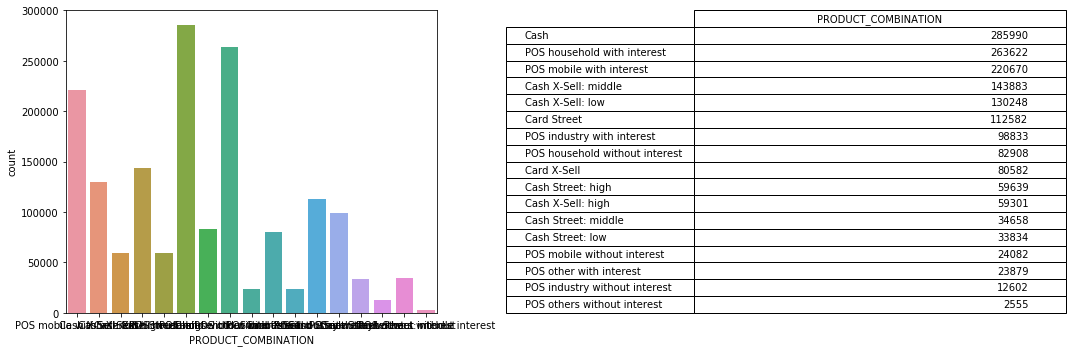

************************************************** NFLAG_INSURED_ON_APPROVAL ********************************************** 

NFLAG_INSURED_ON_APPROVAL	has	40.29812946125467% nulls



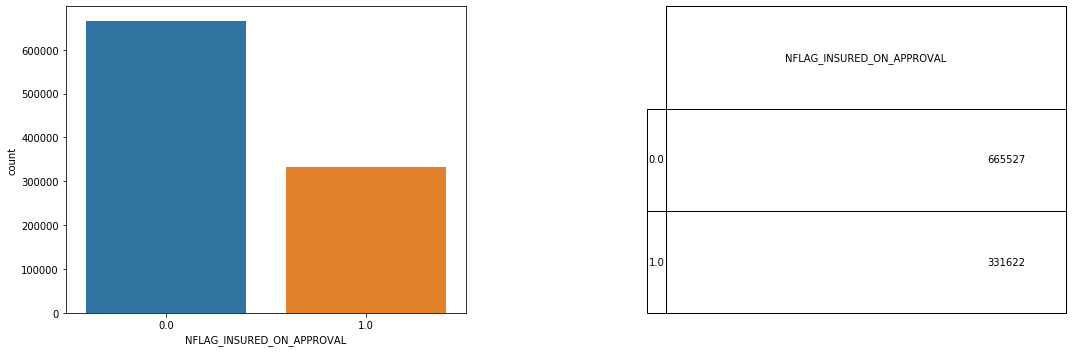

In [53]:
for attr in cat_features:
    print("*"*50, attr, "*"*46, "\n")
    print(f"{attr}\thas\t{(df_prev_app[attr].isna().sum()/ df_prev_app.shape[0])*100}% nulls\n")
    
    y = df_prev_app[attr].value_counts().to_frame()
    
    fig = plt.figure(figsize=(15,5))

    ax1 = fig.add_subplot(121)
    sns.countplot(x=attr, data=df_prev_app)

    ax2 = fig.add_subplot(122)
    font_size=10
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = y.values, rowLabels = y.index, bbox=bbox, colLabels=y.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    plt.tight_layout(w_pad=20)
    plt.show()


## Check missing values

In [7]:
percent = (df_prev_app.isnull().sum()/df_prev_app.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df_prev_app.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
RATE_DOWN_PAYMENT,53.64,895844
AMT_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
DAYS_TERMINATION,40.30,673065
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_FIRST_DRAWING,40.30,673065
DAYS_FIRST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065


## Correlation of features

In [89]:
# Dropping columns RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY as these have more than 99% data missing
df_prev_app.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)

# Create correlation matrix
corr_matrix = df_prev_app.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropping: ", to_drop)
# Drop features 
df_prev_app_new = df_prev_app.drop(df_prev_app[to_drop], axis=1)

df_prev_app_new.head()

Dropping:  ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


## Feature engineering

### OHE on categorical features

In [79]:
df_prev_app_new.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_DOWN_PAYMENT', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [90]:
# cat_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']
# working with selected features for now

cat_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS']




In [93]:
for attr in cat_features:
    df_dummies = pd.DataFrame()
    df_dummies = df_prev_app_new[attr].str.get_dummies()
    print(f"\n{attr}\t:\t" , list(df_dummies.columns))
    df_prev_app_new = pd.concat([df_prev_app_new,df_dummies],axis=1, sort=False)
    df_prev_app_new.drop(attr, axis=1, inplace=True)

print("\nList of attributes in new dataframe:\n", df_prev_app_new.columns)



NAME_CONTRACT_TYPE	:	 ['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA']

WEEKDAY_APPR_PROCESS_START	:	 ['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY']

NAME_CONTRACT_STATUS	:	 ['Approved', 'Canceled', 'Refused', 'Unused offer']

List of attributes in new dataframe:
 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAS

In [94]:
df_prev_app_new.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,...,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Approved,Canceled,Refused,Unused offer
0,2030495,271877,1730.430,17145.0,0.0,15,Y,1,0.0,XAP,...,0,1,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,NaN,11,Y,1,NaN,XNA,...,0,0,0,1,0,0,1,0,0,0
2,2523466,122040,15060.735,112500.0,NaN,11,Y,1,NaN,XNA,...,0,0,0,0,1,0,1,0,0,0
3,2819243,176158,47041.335,450000.0,NaN,7,Y,1,NaN,XNA,...,1,0,0,0,0,0,1,0,0,0
4,1784265,202054,31924.395,337500.0,NaN,9,Y,1,NaN,Repairs,...,0,0,0,1,0,0,0,0,1,0


In [99]:
df_prev_app_new.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_DOWN_PAYMENT', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'NFLAG_INSURED_ON_APPROVAL', 'Cash loans', 'Consumer loans',
       'Revolving loans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY',
       'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused',
       'Unused offer'],
      dtype='object')

## Aggregate by SK_ID_CURR

In [102]:
# Considering 
d = {
 'Cash loans'     : ['sum'],
 'Consumer loans' : ['sum'],
 'Revolving loans': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unused offer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
}


df_out = df_prev_app_new.groupby(by='SK_ID_CURR').agg(d)

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns= ['SK_ID_CURR','Cashloans', 'Consumerloans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean']
display(df_out.head())

,SK_ID_CURR,Cashloans,Consumerloans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,...,Total_records,Tot_AMT_ANNUITY_min,Tot_AMT_ANNUITY_max,Tot_AMT_ANNUITY_mean,Tot_AMT_APPLICATION_min,Tot_AMT_APPLICATION_max,Tot_AMT_APPLICATION_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean
0,100001,0,1,0,0,1,0,0,0,0,...,1,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,-1740,-1740,-1740.0
1,100002,0,1,0,0,0,0,1,0,0,...,1,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,-606,-606,-606.0
2,100003,1,2,0,0,1,0,1,1,0,...,3,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,-2341,-746,-1305.0
3,100004,0,1,0,0,1,0,0,0,0,...,1,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,-815,-815,-815.0
4,100005,1,1,0,0,1,0,0,0,1,...,2,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,-757,-315,-536.0


In [83]:
'''from sklearn.preprocessing import OneHotEncoder # in future versions of Scikit-Learn

cat_encoder = OneHotEncoder()

cat_features2= ['HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']

df_prev_app_cat = df_prev_app_new[cat_features2].values.reshape(-1, 1)
# display(df_prev_app_cat)

df_prev_app_cat_1hot = cat_encoder.fit_transform(df_prev_app_cat, )
df_prev_app_cat_1hot'''

"from sklearn.preprocessing import OneHotEncoder # in future versions of Scikit-Learn\n\ncat_encoder = OneHotEncoder()\n\ncat_features2= ['HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']\n\ndf_prev_app_cat = df_prev_app_new[cat_features2].values.reshape(-1, 1)\n# display(df_prev_app_cat)\n\ndf_prev_app_cat_1hot = cat_encoder.fit_transform(df_prev_app_cat, )\ndf_prev_app_cat_1hot"